In [37]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('./data/data_cleaned.csv')
df

,subreddit,text
0,office,Friend or just a colleague Hi is it just my co...
1,office,Printer systems Good morning. I'm looking for ...
2,office,What Would You Do? Hello everyone!First time p...
3,office,attention yo! I don't want to go to office for...
4,office,Do you have any office-related wisdom to share...
...,...,...
1781,DunderMifflin,Ryan and Robert California are a fantastic duo
1782,DunderMifflin,What did kreed do
1783,DunderMifflin,"Okay, I’m addicted"
1784,DunderMifflin,That's what she said In the Finale episode of ...


In [3]:
df.shape

(1786, 2)

### Posts length

In [4]:
# Exploring length of posts including title and body: counting symbols and words
df['symbols'] = df['text'].apply(len)
df['words'] = df['text'].apply(lambda x: len(x.split()))

In [5]:
# Words overall per subreddit
df.words[df['subreddit'] == 'office'].sum()

67216

In [6]:
df.words[df['subreddit'] == 'DunderMifflin'].sum()

29274

In [7]:
# Ratio
df.words[df['subreddit'] == 'DunderMifflin'].sum() / df.words[df['subreddit'] == 'office'].sum()

0.4355213044513211

In [8]:
# Saving colors to variables
c1 = '#BE3455'
c2 = '#34BE9D'
palette = dict(DunderMifflin = c1, office = c2)

# Setting plots style
sns.set(style='darkgrid')

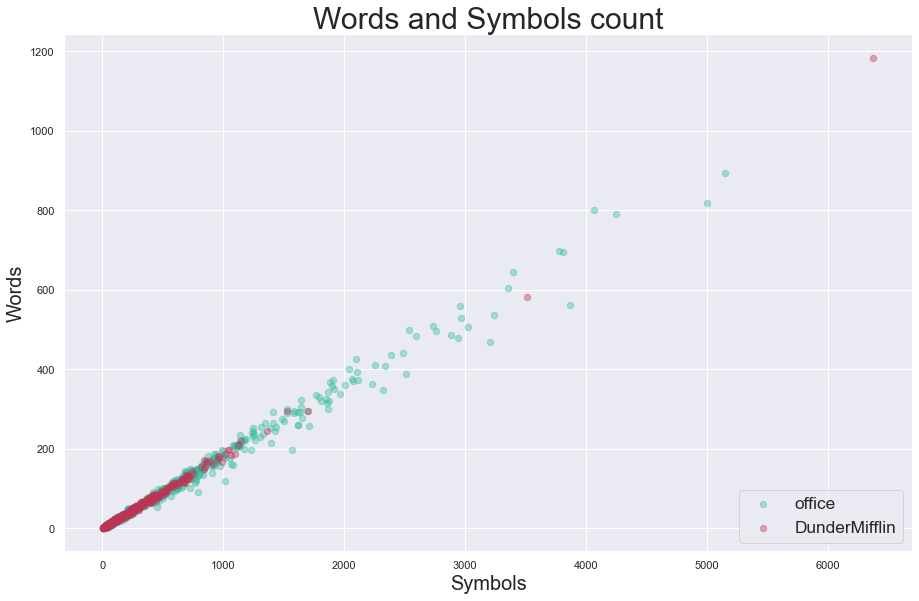

In [43]:
# Scatter plot representing symbols and words

l = sns.lmplot(x = 'symbols', y='words', data = df, hue = 'subreddit', # choosing variables to plot
               fit_reg = False, # removing linear regression line
               palette = palette, # setting associated colors to subreddits
               height=8, aspect=1.6, # size of canvas
               scatter_kws={'s': 40, 'alpha': 0.4}, # markers size and transparency
               legend=False # removing legend so I can set it up with matplotlib
              )

plt.legend(loc='lower right', fontsize = 'x-large')
plt.title('Words and Symbols count', size = 30)
plt.xlabel('Symbols', fontsize = 20)
plt.ylabel('Words', fontsize = 20)

plt.savefig('./images/symbols_and_words.png', dpi = 150); # saving plot;

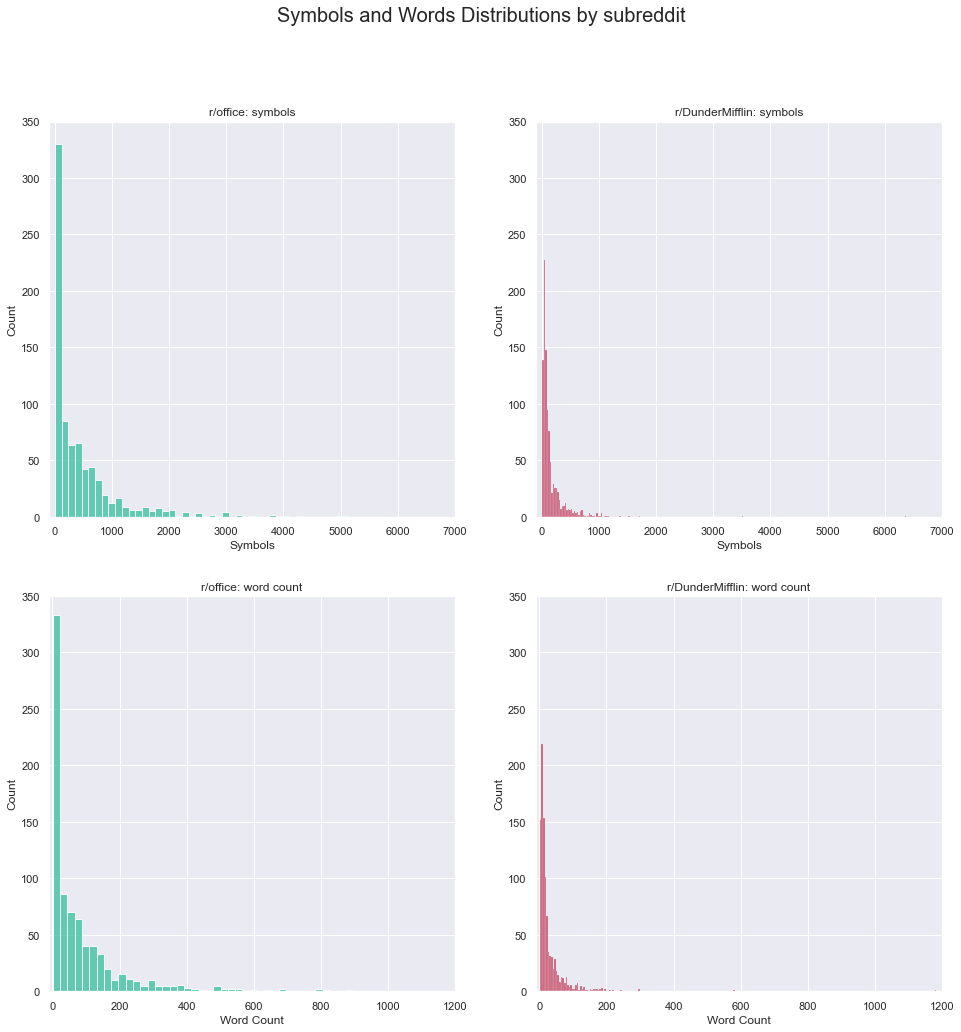

In [10]:
# Words and symbols count distributions
# Inspired by breakfast hour 110-tue
of = df[df['subreddit'] == 'office']
dm = df[df['subreddit'] == 'DunderMifflin']

fig, ax = plt.subplots(2, 2, figsize = (16, 16))

sns.histplot(of['symbols'], ax = ax[0, 0], color = c2)
sns.histplot(dm['symbols'], ax = ax[0,1], color = c1)
sns.histplot(of['words'], ax=ax[1,0], color = c2)
sns.histplot(dm['words'], ax=ax[1,1], color = c1)

ax[0,0].set(xlabel='Symbols', title='r/office: symbols', xlim = [-100, 7_000], ylim = [0, 350])
ax[0,1].set(xlabel='Symbols', title='r/DunderMifflin: symbols', xlim = [-100, 7_000], ylim = [0, 350]) 
ax[1,0].set(xlabel='Word Count', title='r/office: word count', xlim = [-10, 1200], ylim = [0, 350])
ax[1,1].set(xlabel='Word Count', title='r/DunderMifflin: word count', xlim = [-10, 1200], ylim = [0, 350])

fig.suptitle('Symbols and Words Distributions by subreddit', fontsize = 20);

In [11]:
# Summary statistics: r/office
df[df['subreddit']=='office'].describe()

,symbols,words
count,793.000000,793.000000
mean,473.983607,84.761665
std,686.390139,122.220811
min,3.000000,1.000000
25%,55.000000,9.000000
50%,220.000000,40.000000
75%,605.000000,110.000000
max,5152.000000,893.000000


In [12]:
# Summary statistics: r/DunderMifflin
df[df['subreddit']=='DunderMifflin'].describe()

,symbols,words
count,993.000000,993.000000
mean,162.576032,29.480363
std,298.684448,54.477484
min,4.000000,1.000000
25%,43.000000,7.000000
50%,79.000000,14.000000
75%,175.000000,31.000000
max,6378.000000,1183.000000


r/office community members typically write longer posts which could be explained by more descriptive nature of a subreddit compared to visual r/DunderMifflin.
For Dunder Mifflin, average words number is 29 versus 85 for office. 

In [13]:
# Let's look at the longest posts in r/DunderMifflin which clearly pop out on the scatter plot.
df_1 = df[df['symbols'] > 6000]

In [36]:
print('\n'.join(df_1['text'].to_list())) #https://stackoverflow.com/questions/68490745/how-to-display-the-full-text-of-a-column-in-pandas

Robert California's list in s8e1 is actually a good read on each character For reference, [here is the list I'm talking about.]( separated them based off who he thought were winners and losers. After looking at the list, most of it is accurate with a few surprises snuck in, but overall I think its a good read on each character. One-by-one going down the list. WinnersJim - While he starts off the show lazy and complacent, he grows throughout the show in both his professional and personal life and strives to be more. He even starts his own company doing something he loves by the end of the show. Easy winner. Dwight - Best salesman and the most loyal right hand man out there who eventually becomes regional manager. Another easy winner. Oscar - Definitely the smartest in the office and an overall good friend that Kevin and eventually Angela both love, even if he comes off as a know-it-all. Darryl - Another smart and dedicated worker who is eventually promoted and leaves for something bette

So, one post is 2022 Dundie Awards for subreddit members (reference to Dundie Awards in TV series), and second one is a detailed characters analysys. I'm not going to remove these outliers, since I think they will be useful when doing classification.

### Most frequent words

In [15]:
# To count words frequency, I will need a CountVectorizer
# r/office
cv = CountVectorizer(stop_words=stopwords.words('english')) # using nltk stopwords, because default stopword list had too many irrelevant words
text_cv = cv.fit_transform(of['text'])
of_cv = pd.DataFrame(text_cv.todense(), columns=cv.get_feature_names_out())

# r/DunderMifflin
cv = CountVectorizer(stop_words='english')
text_cv_dm = cv.fit_transform(dm['text'])
dm_cv = pd.DataFrame(text_cv_dm.todense(), columns=cv.get_feature_names_out())

In [16]:
# Top 20 words for r/office
of_cv.sum().sort_values(ascending=False).head(20)

office     787
work       473
like       274
one        243
know       196
people     185
time       180
get        174
would      171
job        165
working    158
need       155
new        148
company    142
team       134
desk       128
help       124
want       122
also       117
day        116
dtype: int64

In [17]:
# Top 20 words for r/DunderMifflin
dm_cv.sum().sort_values(ascending=False).head(20)

michael     263
office      194
jim         183
just        165
dwight      155
like        145
think       124
episode     118
pam         110
season       90
andy         88
did          88
time         85
know         76
does         55
ve           54
favorite     52
toby         51
people       50
episodes     49
dtype: int64

In [39]:
# How many words there are?
of_cv.shape, dm_cv.shape

((793, 6995), (993, 4104))

Looking at top words, I think of possibly adding some of them to a custom stop words list. In order to explore common words better, I'll create a dataframe with words frequency. 

In [18]:
# Saving words count to DataFrames
of_2 = pd.DataFrame(of_cv.sum().sort_values(ascending=False))
dm_2 = pd.DataFrame(dm_cv.sum().sort_values(ascending=False))

# Merging two dataframes
words_overlap = of_2.join(dm_2, lsuffix ='_dm',rsuffix = '_of')

# Since I'm interested in words overlap, I can drop words that aren't present in r/office data
words_overlap.dropna(inplace = True)

In [19]:
words_overlap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, office to directions
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0_dm    2022 non-null   int64  
 1   0_of    2022 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 47.4+ KB


In [20]:
# Fixing 0_of column type
words_overlap['0_of'] = words_overlap['0_of'].astype(int)

In [21]:
# Renaming columns
words_overlap.columns = ['office', 'DunderMifflin']

In [22]:
# Summing up words count for both subreddits
words_overlap['overall'] = words_overlap['office'] + words_overlap['DunderMifflin']

# Saving csv
words_overlap.sort_values(by = 'overall', ascending = False).to_csv('./data/words_overlap.csv')

In [23]:
words_overlap.head(3)

,office,DunderMifflin,overall
office,787,194,981
work,473,33,506
like,274,145,419


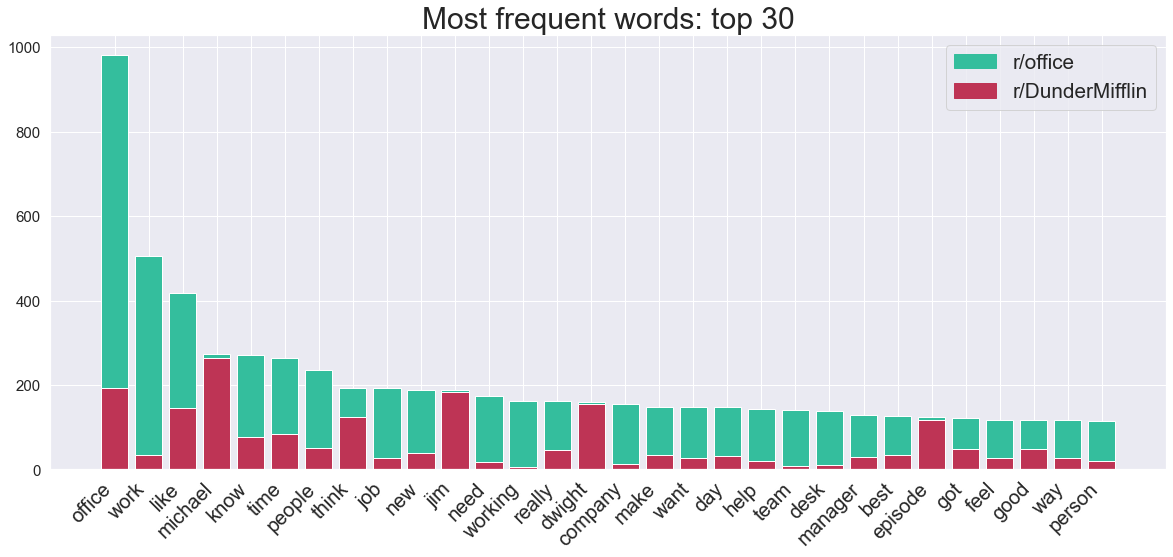

In [24]:
# Visualizing overlapping words
top_30 = words_overlap.sort_values(by = 'overall', ascending = False)[:30] # plotting only top 30 words, sorted by overall frequency

#top_30.plot(y = ['office', 'DunderMifflin'], kind='bar', width = 0.8, rot = 0, color = palette) # plot

plt.bar(top_30.index, top_30.overall, color = c2)
plt.bar(top_30.index, top_30.DunderMifflin, color = c1)

plt.xticks(rotation = 45, ha='right') # xlabels rotation and alignment
plt.gcf().set_size_inches(20,8) # figure size
plt.title('Most frequent words: top 30', size = 30) # title

plt.xticks(size = 20) # x labels size
plt.yticks(size = 15) # y labels size

# Manually recreating legend 
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
green_patch = mpatches.Patch(color=c2, label='r/office')
magenta_patch = mpatches.Patch(color=c1, label='r/DunderMifflin')
plt.legend(handles=[green_patch, magenta_patch], fontsize = 'xx-large')

plt.savefig('./images/most_frequent_words_nltk.png', dpi = 100); # saving plot

#### Custom stop words

When modelling, I want to check, if classification accuracy improves when I add words that are common for both subreddits to a custom stoplist and have similar density. For that purpose, I'm going to calculate words ratio for r/office data which is words count in subreddit divided by words count overall. As long as there is a significantly different number of words overall between subreddits, I'll normalize words count on r/office by multiplying it by a ratio of overall number of words, which is 0.436 (calculated in cell # 212). Words with ratio close to equal will be added to a custom stoplist.

In [25]:
# Calculating ratio
words_overlap['ratio'] = words_overlap['DunderMifflin'] / (words_overlap['DunderMifflin'] + words_overlap['office']*0.436)

In [26]:
words_overlap

,office,DunderMifflin,overall,ratio
office,787,194,981,0.361178
work,473,33,506,0.137944
like,274,145,419,0.548279
know,196,76,272,0.470716
people,185,50,235,0.382673
...,...,...,...,...
differences,1,1,2,0.696379
difference,1,3,4,0.873108
paint,1,2,3,0.821018
pants,1,6,7,0.932256


In [27]:
# Word 'office' will be my lower cutoff threshold, and 1 - office ratio will be an upper one
common = words_overlap[words_overlap['ratio'].between(0.36, 0.64)]
words_overlap[words_overlap['ratio'].between(0.36, 0.64)]

,office,DunderMifflin,overall,ratio
office,787,194,981,0.361178
like,274,145,419,0.548279
know,196,76,272,0.470716
people,185,50,235,0.382673
time,180,85,265,0.519941
...,...,...,...,...
distracted,2,1,3,0.534188
graduated,2,1,3,0.534188
glance,2,1,3,0.534188
commented,2,1,3,0.534188


In [38]:
# Saving common words for future use
common.drop(columns=['office', 'DunderMifflin', 'overall']).to_csv('./data/common_words.csv')

### Most frequent Bigrams

In [31]:
# Instantiating Count Vectorizer with bigrams
cv2 =  CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(2,2))

# Creating bigrams for r/DunderMifflin
dm_bi = cv2.fit_transform(dm['text'])
dm_bigrams = pd.DataFrame(dm_bi.todense(), columns=cv2.get_feature_names_out())

# Creating bigrams for r/office
of_bi = cv2.fit_transform(of['text'])
of_bigrams = pd.DataFrame(of_bi.todense(), columns=cv2.get_feature_names_out())

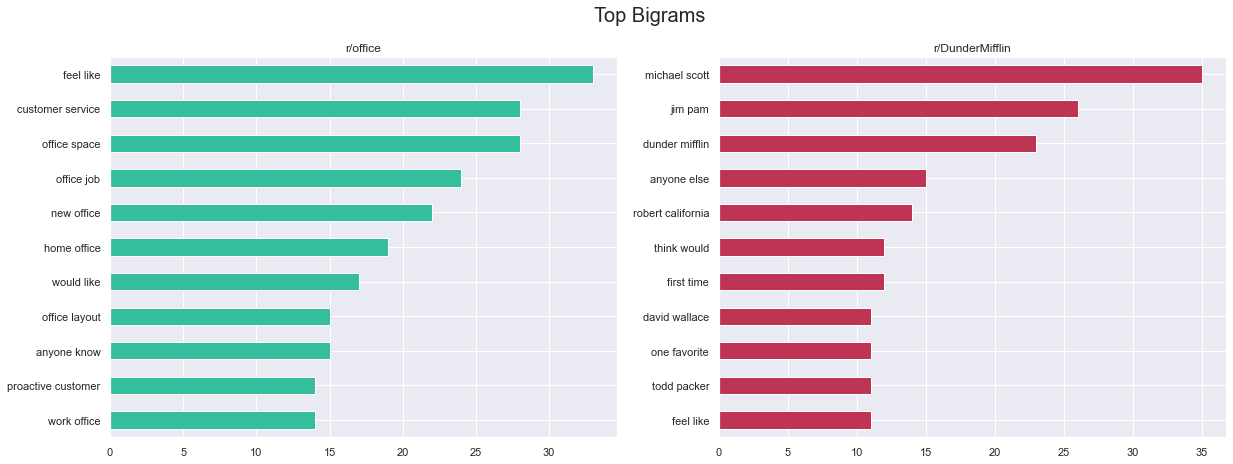

In [32]:
# inspired by breakfast hour 110-tue
fig, ax = plt.subplots(1,2, figsize=(20,7))
of_bigrams.sum().sort_values(ascending=False).head(11).plot(kind='barh', ax=ax[0], color = c2)
dm_bigrams.sum().sort_values(ascending=False).head(11).plot(kind='barh', ax=ax[1], color = c1)

ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set(title = 'r/office')
ax[1].set(title = 'r/DunderMifflin')

fig.suptitle('Top Bigrams', fontsize = 20)

plt.savefig('./images/bigrams.png', dpi = 100); # saving plot;

Bigrams mostly represent what people talk about, like character names in r/DundderMifflin or 'customer service' or 'office space' in r/office. Interesting, but given different nature of two subreddits, there are also common bigrams as "feel like" present.

### Most frequent Trigrams

In [33]:
# Instantiating Count Vectorizer with trigrams
cv3 =  CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(3,3))

# Creating trigrams for r/DunderMifflin
dm_tri = cv3.fit_transform(dm['text'])
dm_trigrams = pd.DataFrame(dm_tri.todense(), columns=cv3.get_feature_names_out())

# Creating trigrams for r/office
of_tri = cv3.fit_transform(of['text'])
of_trigrams = pd.DataFrame(of_tri.todense(), columns=cv3.get_feature_names_out())

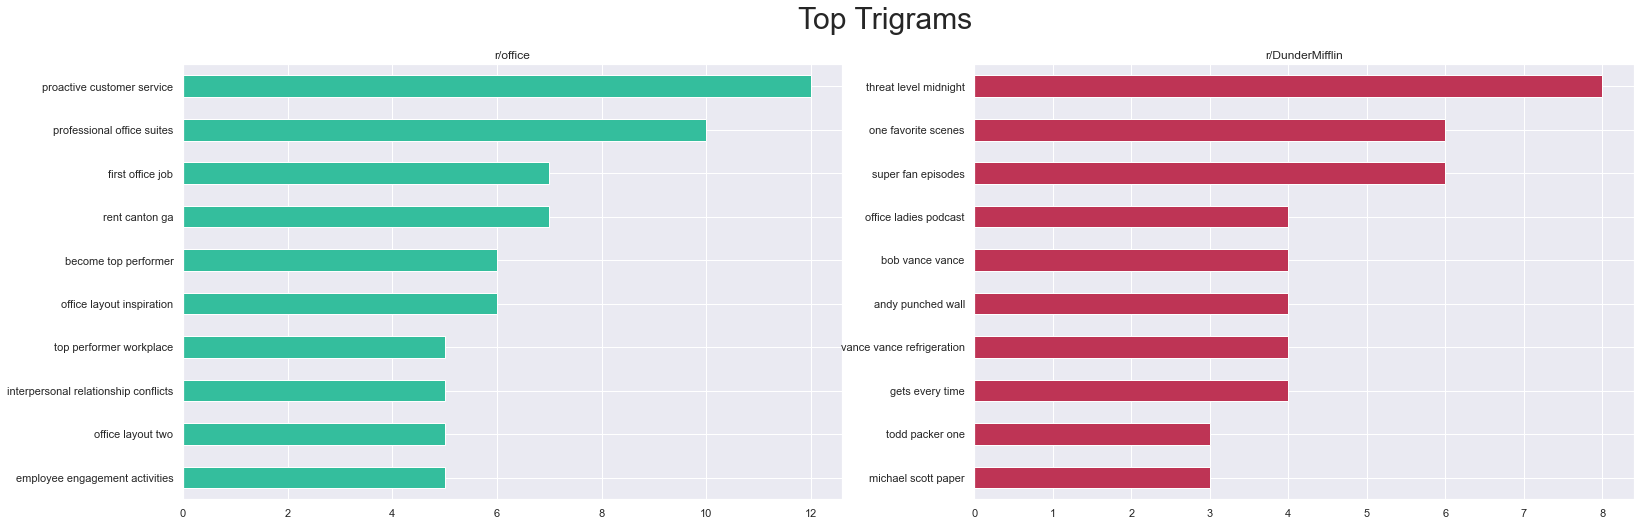

In [34]:
# Plotting Trigrams
fig, ax = plt.subplots(1,2, figsize=(26,8))
of_trigrams.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], color = c2)
dm_trigrams.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], color = c1)

ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set(title = 'r/office')
ax[1].set(title = 'r/DunderMifflin')

#plt.xticks(size = 20) # x labels size
#plt.yticks(size = 15)

fig.suptitle('Top Trigrams', fontsize = 30);

Trigrams separate subreddits much clearer, getting deeper into their themes, so I'm definitely going to try `ngram_range=(3,3)` when modeling. As an 'The Office' fan, I think I know what's the most popular quadrigram, but let's check that hypothesis.

In [35]:
# Instantiating Count Vectorizer with quadrigrams
cv4 =  CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(4,4))

# Creating quadrigrams for r/DunderMifflin
dm_quad = cv4.fit_transform(dm['text'])
dm_quad = pd.DataFrame(dm_quad.todense(), columns=cv4.get_feature_names_out())

# Creating quadrigrams for r/office
of_quad = cv4.fit_transform(of['text'])
of_quad = pd.DataFrame(of_quad.todense(), columns=cv4.get_feature_names_out())

# Top r/DunderMifflin quadrigram
dm_quad.sum().sort_values(ascending=False).head(1)

bob vance vance refrigeration    4
dtype: int64

Apparently, my guess was right.